In [56]:
import pandas as pd

In [57]:
import numpy as np

In [58]:
import matplotlib as plt
import seaborn as sns

In [59]:
df=pd.read_csv('movies.csv')

In [60]:
df


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [61]:
df1=pd.read_csv('ratings.csv')
df1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [107]:
df1[df1['rating'] == 5.0]

,userId,movieId,rating,timestamp
3,1,47,5.0,964983815
4,1,50,5.0,964982931
6,1,101,5.0,964980868
8,1,151,5.0,964984041
9,1,157,5.0,964984100
...,...,...,...,...
100814,610,158238,5.0,1479545219
100829,610,164179,5.0,1493845631
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047


In [62]:
df1['userId'].describe()

count    100836.000000
mean        326.127564
std         182.618491
min           1.000000
25%         177.000000
50%         325.000000
75%         477.000000
max         610.000000
Name: userId, dtype: float64

In [63]:
df1['userId'].nunique()

610

In [64]:
ratings_with_users=df1.merge(df,on='movieId')

In [65]:
ratings_with_users 

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [110]:
l1=ratings_with_users[(ratings_with_users['genres'] == 'Sci-Fi') and (ratings_with_users['rating'] == 5.0)]
l1

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [66]:
ratings_with_users['title']

0                         Toy Story (1995)
1                         Toy Story (1995)
2                         Toy Story (1995)
3                         Toy Story (1995)
4                         Toy Story (1995)
                        ...               
100831                    Bloodmoon (1997)
100832    Sympathy for the Underdog (1971)
100833                       Hazard (2005)
100834                  Blair Witch (2016)
100835                           31 (2016)
Name: title, Length: 100836, dtype: object

In [67]:
ratings_with_users['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [68]:
ratings_with_users.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [69]:
num_rating_df=ratings_with_users.groupby('title').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)
num_rating_df

,title,num_ratings
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [70]:
avg_rating_df=ratings_with_users.groupby('title').mean()['rating'].reset_index()
avg_rating_df.rename(columns={'rating':'avg_ratings'},inplace=True)
avg_rating_df

,title,avg_ratings
0,'71 (2014),4.000000
1,'Hellboy': The Seeds of Creation (2004),4.000000
2,'Round Midnight (1986),3.500000
3,'Salem's Lot (2004),5.000000
4,'Til There Was You (1997),4.000000
...,...,...
9714,eXistenZ (1999),3.863636
9715,xXx (2002),2.770833
9716,xXx: State of the Union (2005),2.000000
9717,¡Three Amigos! (1986),3.134615


In [71]:
popular_df=num_rating_df.merge(avg_rating_df,on='title')
popular_df


,title,num_ratings,avg_ratings
0,'71 (2014),1,4.000000
1,'Hellboy': The Seeds of Creation (2004),1,4.000000
2,'Round Midnight (1986),2,3.500000
3,'Salem's Lot (2004),1,5.000000
4,'Til There Was You (1997),2,4.000000
...,...,...,...
9714,eXistenZ (1999),22,3.863636
9715,xXx (2002),24,2.770833
9716,xXx: State of the Union (2005),5,2.000000
9717,¡Three Amigos! (1986),26,3.134615


In [72]:
df4=popular_df[popular_df['num_ratings'] > 50].sort_values('avg_ratings',ascending=False).head(50)
df4

,title,num_ratings,avg_ratings
7593,"Shawshank Redemption, The (1994)",317,4.429022
3499,"Godfather, The (1972)",192,4.289062
3011,Fight Club (1999),218,4.272936
1961,Cool Hand Luke (1967),57,4.271930
2531,Dr. Strangelove or: How I Learned to Stop Worr...,97,4.268041
6999,Rear Window (1954),84,4.261905
3500,"Godfather: Part II, The (1974)",129,4.259690
2334,"Departed, The (2006)",107,4.252336
3564,Goodfellas (1990),126,4.250000
1593,Casablanca (1942),100,4.240000


In [73]:
df5=df4.merge(df,on='title')
df5

,title,num_ratings,avg_ratings,movieId,genres
0,"Shawshank Redemption, The (1994)",317,4.429022,318,Crime|Drama
1,"Godfather, The (1972)",192,4.289062,858,Crime|Drama
2,Fight Club (1999),218,4.272936,2959,Action|Crime|Drama|Thriller
3,Cool Hand Luke (1967),57,4.271930,1276,Drama
4,Dr. Strangelove or: How I Learned to Stop Worr...,97,4.268041,750,Comedy|War
5,Rear Window (1954),84,4.261905,904,Mystery|Thriller
6,"Godfather: Part II, The (1974)",129,4.259690,1221,Crime|Drama
7,"Departed, The (2006)",107,4.252336,48516,Crime|Drama|Thriller
8,Goodfellas (1990),126,4.250000,1213,Crime|Drama
9,Casablanca (1942),100,4.240000,912,Drama|Romance


In [100]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('div', attrs={'class' : 'rating'})
    return imdb_rating.text if imdb_rating else np.nan

In [87]:
df5['genres']

0                                          Crime|Drama
1                                          Crime|Drama
2                          Action|Crime|Drama|Thriller
3                                                Drama
4                                           Comedy|War
5                                     Mystery|Thriller
6                                          Crime|Drama
7                                 Crime|Drama|Thriller
8                                          Crime|Drama
9                                        Drama|Romance
10                             Action|Crime|Drama|IMAX
11                              Crime|Mystery|Thriller
12             Action|Adventure|Comedy|Fantasy|Romance
13                             Action|Adventure|Sci-Fi
14                                           Drama|War
15                                    Action|Drama|War
16                                         Crime|Drama
17                             Action|Adventure|Sci-Fi
18        

In [92]:
df5.groupby('genres')['num_ratings'].count().sort_values('num_ratings',ascending=False)

ValueError: No axis named num_ratings for object type <class 'pandas.core.series.Series'>

In [74]:
df4['num_ratings'].describe()

count     50.000000
mean     145.080000
std       74.030562
min       55.000000
25%       88.000000
50%      129.000000
75%      195.000000
max      329.000000
Name: num_ratings, dtype: float64

In [75]:
popular_df[popular_df['num_ratings'] > 50].sort_values('num_ratings',ascending=False).head(5)

,title,num_ratings,avg_ratings
3158,Forrest Gump (1994),329,4.164134
7593,"Shawshank Redemption, The (1994)",317,4.429022
6865,Pulp Fiction (1994),307,4.197068
7680,"Silence of the Lambs, The (1991)",279,4.161290
5512,"Matrix, The (1999)",278,4.192446


In [76]:
ratings_with_users['title'].describe()

count                  100836
unique                   9719
top       Forrest Gump (1994)
freq                      329
Name: title, dtype: object

In [77]:
ratings_with_users[ratings_with_users['title'] == 'Matrix, The (1999)']['genres'].describe()

count                        278
unique                         1
top       Action|Sci-Fi|Thriller
freq                         278
Name: genres, dtype: object

In [78]:
df2=pd.read_csv('tags.csv')

In [79]:
df2

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [80]:
tags_with_movies=df2.merge(df,on='movieId')



In [81]:
tags_with_movies

,userId,movieId,tag,timestamp,title,genres
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,1445714996,Step Brothers (2008),Comedy
2,2,60756,will ferrell,1445714992,Step Brothers (2008),Comedy
3,62,60756,comedy,1528934384,Step Brothers (2008),Comedy
4,62,60756,funny,1528934381,Step Brothers (2008),Comedy
...,...,...,...,...,...,...
3678,606,5694,70mm,1175638092,Staying Alive (1983),Comedy|Drama|Musical
3679,606,6107,World War II,1178473747,Night of the Shooting Stars (Notte di San Lore...,Drama|War
3680,606,7936,austere,1173392334,Shame (Skammen) (1968),Drama|War
3681,610,3265,gun fu,1493843984,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller


In [82]:
tags_with_movies[tags_with_movies['title'] == 'Matrix, The (1999)']

,userId,movieId,tag,timestamp,title,genres
1270,424,2571,martial arts,1457842912,"Matrix, The (1999)",Action|Sci-Fi|Thriller
1271,424,2571,sci-fi,1457842899,"Matrix, The (1999)",Action|Sci-Fi|Thriller
1272,474,2571,alternate universe,1137204991,"Matrix, The (1999)",Action|Sci-Fi|Thriller
1273,537,2571,philosophy,1424141098,"Matrix, The (1999)",Action|Sci-Fi|Thriller
1274,537,2571,post apocalyptic,1424141101,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [83]:
ratings_with_users[ratings_with_users['title'] == 'Terminator 2: Judgment Day (1991)']['rating'].mean()

3.970982142857143

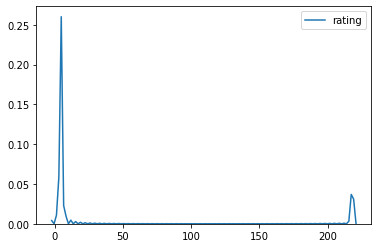

In [84]:
data=ratings_with_users[ratings_with_users['title'] == 'Fight Club (1999)']['rating'].describe()
sns.kdeplot(data)